In [1]:
import numpy as np
import matplotlib.pyplot as plt
import msmrd2.tools.analysis as analysisTools
import timeit
from matplotlib import rc
rc('text', usetex=True)

In [2]:
# Main parameters
numparticles = 3
boxsize = 6 #2.5 #10 #8 #6 #5 
D = 1.0
Drot = 1.0
lagtime = 40 # 100
rootDirectory = '../../data/pentamer/first_passage_times/'

In [3]:
# Color definitions
c1 = '#ff3300' #'xkcd:bright orange' # 'darkorange' #'C1' # '#ff3300' # for benchmark
c2 = '#0099ff' #'royalblue' #'royalblue' # 'C0' # '#0099ff' # for MSM/RD
c1alt = 'xkcd:bright orange'
c2alt = 'royalblue'
# Alpha transparency definition
a1 = 0.2 #0.2
a2 = 0.7 #0.9 #0.7

## Load FPT for trimer formation data (bechmark and MSMRD)

In [4]:
# Load benchmark FPT data computed by script
numTrajs = 12000
filename1 = rootDirectory + 'pentamerFPTs_trajs' + str(numTrajs) + '_boxsize' + str(boxsize) + '.xyz'
fpts = []
with open(filename1) as file:
    for line in file:
        state, time = line.split(" ")
        time = float(time)
        fpts.append(time)

# Normalize weights
weights = np.ones_like(fpts)/float(len(fpts))

In [5]:
# Load FPT data obtained with MSMRD integrator
numTrajs = 18000
filename = rootDirectory + 'MSMRDpentamerFPTs_trajs' + str(numTrajs) + '_lagt' + str(lagtime) +  '_boxsize' + str(boxsize) + '.xyz'
#filename = rootDirectory + 'trimerFPTs_trajs' + str(numTrajs) + '_boxsize' + str(boxsize) + '.xyz'
MSMRDfpts = []
with open(filename) as file:
    for line in file:
        state, time = line.split(" ")
        time = float(time)
        MSMRDfpts.append(time)
            
# Normalize weights
weightsMSMRD = np.ones_like(MSMRDfpts)/float(len(MSMRDfpts))

In [6]:
fpts = np.array(fpts)
fpts[fpts > 400]

array([], dtype=float64)

### Calculation of FPTs and comparisons plots

In [7]:
# Compuate mean and standard deviation of bootstrapped samples of benchmark
calculateRates = True
numBootsrapSamples = 2000
mfpt, fptstd = analysisTools.bootstrapping(fpts, numBootsrapSamples)
print("Raw MFPTs: ", np.array(fpts).mean())
print("Bootstrapping mean and std (A): ", mfpt, fptstd)
# Compuate mean and standard deviation of bootstrapped samples of MSMRD simulation
MSMRDmfpt, MSMRDfptstd = analysisTools.bootstrapping(MSMRDfpts, numBootsrapSamples)
print("Raw MSMRD MFPTs: ",np.array(MSMRDfpts).mean())
print("MSMRD bootstrapping mean and std: ", MSMRDmfpt, MSMRDfptstd)
print("Trajectory lengths")
if calculateRates:
    mkon = 1.0/mfpt
    MSMRDmkon = 1.0/MSMRDmfpt
    konstd = fptstd/(mfpt*mfpt)
    MSMRDkonstd = MSMRDfptstd/(MSMRDmfpt*MSMRDmfpt)
    errorKon = np.abs(mkon - MSMRDmkon)
    relErrorKon = errorKon/mkon
    print("On rates:")
    print("Bootstrapping mean and std:", mkon, konstd)
    print("Bootstrapping MSMRD mean and std:", MSMRDmkon, MSMRDkonstd)
    print("Error and relative error:", errorKon, relErrorKon)

Raw MFPTs:  18.590800000073596
Bootstrapping mean and std (A):  18.58724813678962 0.7386638311536272
Raw MSMRD MFPTs:  76.06307256407406
MSMRD bootstrapping mean and std:  76.07123346430663 0.5225099984000907
Trajectory lengths
On rates:
Bootstrapping mean and std: 0.05380032550492004 0.002138044010727904
Bootstrapping MSMRD mean and std: 0.013145573621718778 9.029291808808926e-05
Error and relative error: 0.040654751883201265 0.755659961192677


(0.0, 400.0)

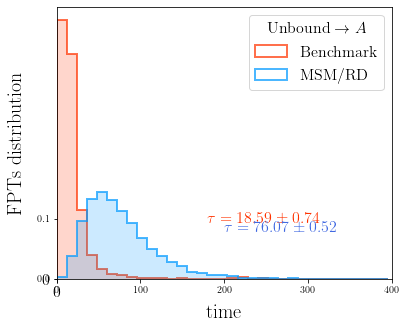

In [8]:
# PLOT FOR PAPER #
# Configure figure
fig, ax1 = plt.subplots(nrows=1, figsize=(6,5))
fig.subplots_adjust(hspace=0)
fsize = 16
plt.rcParams['xtick.labelsize']=fsize
plt.rcParams['ytick.labelsize']=fsize
# Set outer common axes titles
ax0 = fig.add_subplot(111, frameon=False)
ax0.set_xlabel(r'$\mathrm{time}$', fontsize=fsize + 4)
ax0.set_ylabel(r'$\mathrm{FPTs \ distribution}$', labelpad=17, fontsize=fsize + 4)
ax0.set_xticks([0])
ax0.set_yticks([0])
#hbins = range(0, 500,15)
hbins = range(0, 400,12)
#hbins = range(0, 200,6)
#hbins = range(0, 300,9)
#hbins = range(0, 100,3)
#hbins = range(0, 33,1)


# Plot A to unbound histogram
ax1.hist(fpts, bins = hbins, alpha=a1, color=c1, weights = weights );
ax1.hist(fpts, bins = hbins, alpha=a2, edgecolor=c1, lw=2, histtype='step', 
         facecolor = 'None', weights = weights, label =r'$\mathrm{Benchmark}$');
ax1.hist(MSMRDfpts, bins = hbins, alpha=a1, color=c2, weights = weightsMSMRD);
ax1.hist(MSMRDfpts, bins = hbins, alpha=a2, edgecolor=c2, lw=2, histtype='step', 
         weights = weightsMSMRD, label =r'$\mathrm{MSM/RD}$');
ax1.legend(fontsize=fsize, title=r'$\mathrm{Unbound} \rightarrow A$', title_fontsize = fsize, fancybox=True)
ax1.text(180, 0.095, r'$\tau = {:.2f} \pm {:.2f}$'.format(mfpt, fptstd), fontsize=fsize, color=c1)
ax1.text(200, 0.080, r'$\tau = {:.2f} \pm {:.2f}$'.format(MSMRDmfpt, MSMRDfptstd), fontsize=fsize, color=c2alt)
ax1.set_yticks(np.arange(0, 0.18, step=0.1));
#ax1.set_xlim([0,33])
#ax1.set_ylim([0,0.18])
ax1.set_xlim([0,400])

#plt.savefig('pentamerFPTs.pdf', bbox_inches='tight')
#plt.savefig('pentamerFPTs.svg', bbox_inches='tight')